# Data Reading and Inspection.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import gc


In [2]:
digit=pd.read_csv("D:\\PYTHON_MAIN_COURSE(IIIT-Bnglr)\\COURSE-4-ML_PRED-ANALYSIS-2\\ASSIGNMENT\\DIGIT_RECOGNITION_SVM\\train.csv")

In [3]:
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
digit.isnull().sum(axis=1).any()

False

In [7]:
digit.isnull().sum(axis=0).any()

False

## As evident from here ,no missing value as such.

# Plot of some digits.

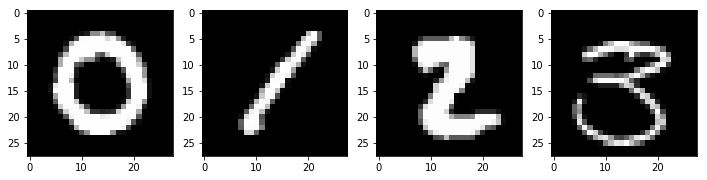

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
zero=digit.iloc[1,1:]
zero=zero.values.reshape(28,28)
plt.imshow(zero,cmap='gray')

plt.subplot(1,4,2)
one=digit.iloc[0,1:]
one=one.values.reshape(28,28)
plt.imshow(one,cmap='gray')



plt.subplot(1,4,3)
two = digit.iloc[16, 1:]
two = two.values.reshape(28, 28)
plt.imshow(two, cmap='gray')

plt.subplot(1,4,4)
three=digit.iloc[7,1:]
three=three.values.reshape(28,28)
plt.imshow(three,cmap='gray')

In [9]:
digit['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [10]:
round(digit['label'].value_counts()/len(digit.index)*100,2)

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [11]:
## the percentage of all the digits appearing in the data is almost 10% +- 1% ,so in all we have fairly balanced data,bcoz
## svm normally does'nt do good work on unbalanced data.

In [12]:
## Splitting into X and Y
x=digit.drop('label',axis=1)
y=digit['label']

In [13]:
x=scale(x)

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [14]:
##Splitting into train and test,where training set is 20 % data and test set is 90 % data. 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.10, random_state=10)

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (4200, 784)
x_test :  (37800, 784)
y_train :  (4200,)
y_test :  (37800,)


## Model Building. 

In [17]:
#linear model
model_linear = SVC(kernel='linear')
model_linear.fit(x_train,y_train)

#predict
y_pred=model_linear.predict(x_test)

In [18]:
y_pred[:10]

array([7, 3, 9, 8, 6, 9, 7, 7, 9, 6], dtype=int64)

In [ ]:
#confusion matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8999470899470899 

[[3619    0   17    4   12   21   33    1    3    6]
 [   0 4111   19   21    9    4    3    6   20    8]
 [  65   72 3299   63   82   17   41   33   88    7]
 [  30   25   97 3478   14  139    6   31   86   43]
 [   8   19   43    4 3355    4   22   13    3  153]
 [  55   30   29  160   58 2978   61    7   58   20]
 [  33    8   81    5   35   40 3480    1    9    0]
 [   6   47   65   19  139   13    2 3554   15  115]
 [  52  104   88  130   33  180   30    9 3011   35]
 [  12   13   46   65  228   30    2  195   24 3133]]


In [ ]:
## Class wise accuracy
class_wise_accuracy=metrics.classification_report(y_true=y_test,y_pred=y_pred)
print(class_wise_accuracy)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3716
           1       0.93      0.98      0.95      4201
           2       0.87      0.88      0.87      3767
           3       0.88      0.88      0.88      3949
           4       0.85      0.93      0.88      3624
           5       0.87      0.86      0.87      3456
           6       0.95      0.94      0.94      3692
           7       0.92      0.89      0.91      3975
           8       0.91      0.82      0.86      3672
           9       0.89      0.84      0.86      3748

   micro avg       0.90      0.90      0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [ ]:
gc.collect()

22

## Non linear model

In [ ]:
## Nonlinear SVM
non_linear_model=svm.SVC(kernel='rbf')
non_linear_model.fit(x_train,y_train)

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predict
prediction= non_linear_model.predict(x_test)

# Accuracy
print(metrics.accuracy_score(y_true=y_test, y_pred=prediction))

0.9201851851851852


In [ ]:
## Confusion matrix
print(metrics.confusion_matrix(y_true=y_test,y_pred=prediction))

[[3587    0   40    5    6   10   39    3   24    2]
 [   0 4111   25   21    9    5    9    4   12    5]
 [  19   16 3543   32   48    4   20   22   54    9]
 [  12   19  219 3465    8   74    9   36   81   26]
 [   5    7   87    0 3392   10   18   13    5   87]
 [  27   12   70  107   35 3063   69    6   37   30]
 [  20    6  110    0   13   35 3492    0   16    0]
 [   8   33  173    7   69    3    2 3551    6  123]
 [  18   52   72   67   25   81   18   14 3279   46]
 [  15   11   94   57  119    9    1  112   30 3300]]


In [ ]:
## Class wise accuracy
class_wise_accuracy=metrics.classification_report(y_true=y_test,y_pred=prediction)
print(class_wise_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3716
           1       0.96      0.98      0.97      4201
           2       0.80      0.94      0.86      3767
           3       0.92      0.88      0.90      3949
           4       0.91      0.94      0.92      3624
           5       0.93      0.89      0.91      3456
           6       0.95      0.95      0.95      3692
           7       0.94      0.89      0.92      3975
           8       0.93      0.89      0.91      3672
           9       0.91      0.88      0.89      3748

   micro avg       0.92      0.92      0.92     37800
   macro avg       0.92      0.92      0.92     37800
weighted avg       0.92      0.92      0.92     37800



In [ ]:
## there is a slight increase in accuracy when using rbf kernel,now using grid search cv  to tune hyper parameters.

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy',
                        n_jobs=-1,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)                  


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [ ]:
cv_results

In [ ]:
## Converting c into numeric type to plot on x axis
cv_results['param_C']=cv_results['param_C'].astype('int')

# plotting
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('log')


plt.subplot(1,3,2)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('log')


plt.subplot(1,3,3)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('log')



In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

## From the above plot we can infer:--

#### 1) At gammaa=.01,the model is acheiving 75 % approx on test data but full on train data.

#### 2) At gamma= .001,initially at c=1 both the accuracies are comparable  but as c increases the model begins to overfit as train data increases but test data does not.

#### 3) At gamma=.0001 , the model accuracies are till c=10 but at large value of c it tends to overfit.
 

### So from here we can infer that ,best combination is at c==10 and gamma=.001 ,thats where test accuracy is highest.(~92%) 

# Building and Evaluating the Final model. 

In [ ]:
#  final model with optimal hyperparameters and testing the best accuracy.


# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



## Conclusion

#### The accuracy on linear kernel is 90% and on non linear kernel it is 93% ,we can say that the problem is non linear in nature.